In [51]:
from grover_num_list_cirq import search_index_list
from quantum_operation import QuantumOperation
from qiskit.tools.visualization import plot_histogram

from qiskit import Aer, transpile

In [52]:
import random
import timeit

In [53]:
data_arr = list(range(3))
random.shuffle(data_arr)
win = random.sample(data_arr, 1)

print(f"Data array: {data_arr} , the winner: {win}")

Data array: [3, 4, 2, 1, 0] , the winner: [3]


In [54]:
st = timeit.default_timer()
sol = []
for i, val in enumerate(data_arr):
    if val in win:
        sol.append(i)
        
end = timeit.default_timer()
print(f"Time: {end - st} , solution : {sol}")

Time: 0.00020379992201924324 , solution : [0]


In [62]:
block_diagram = False

In [63]:
search_indedx_object = search_index_list()
grover_cirq_list = search_indedx_object.create_grover(data_array=data_arr, winner_list=win, num_solution=1,block_diagram=block_diagram)
print(grover_cirq_list)

In [64]:
run_qc = grover_cirq_list[0]
run_qc = search_indedx_object.add_qubit_measurement(run_qc)

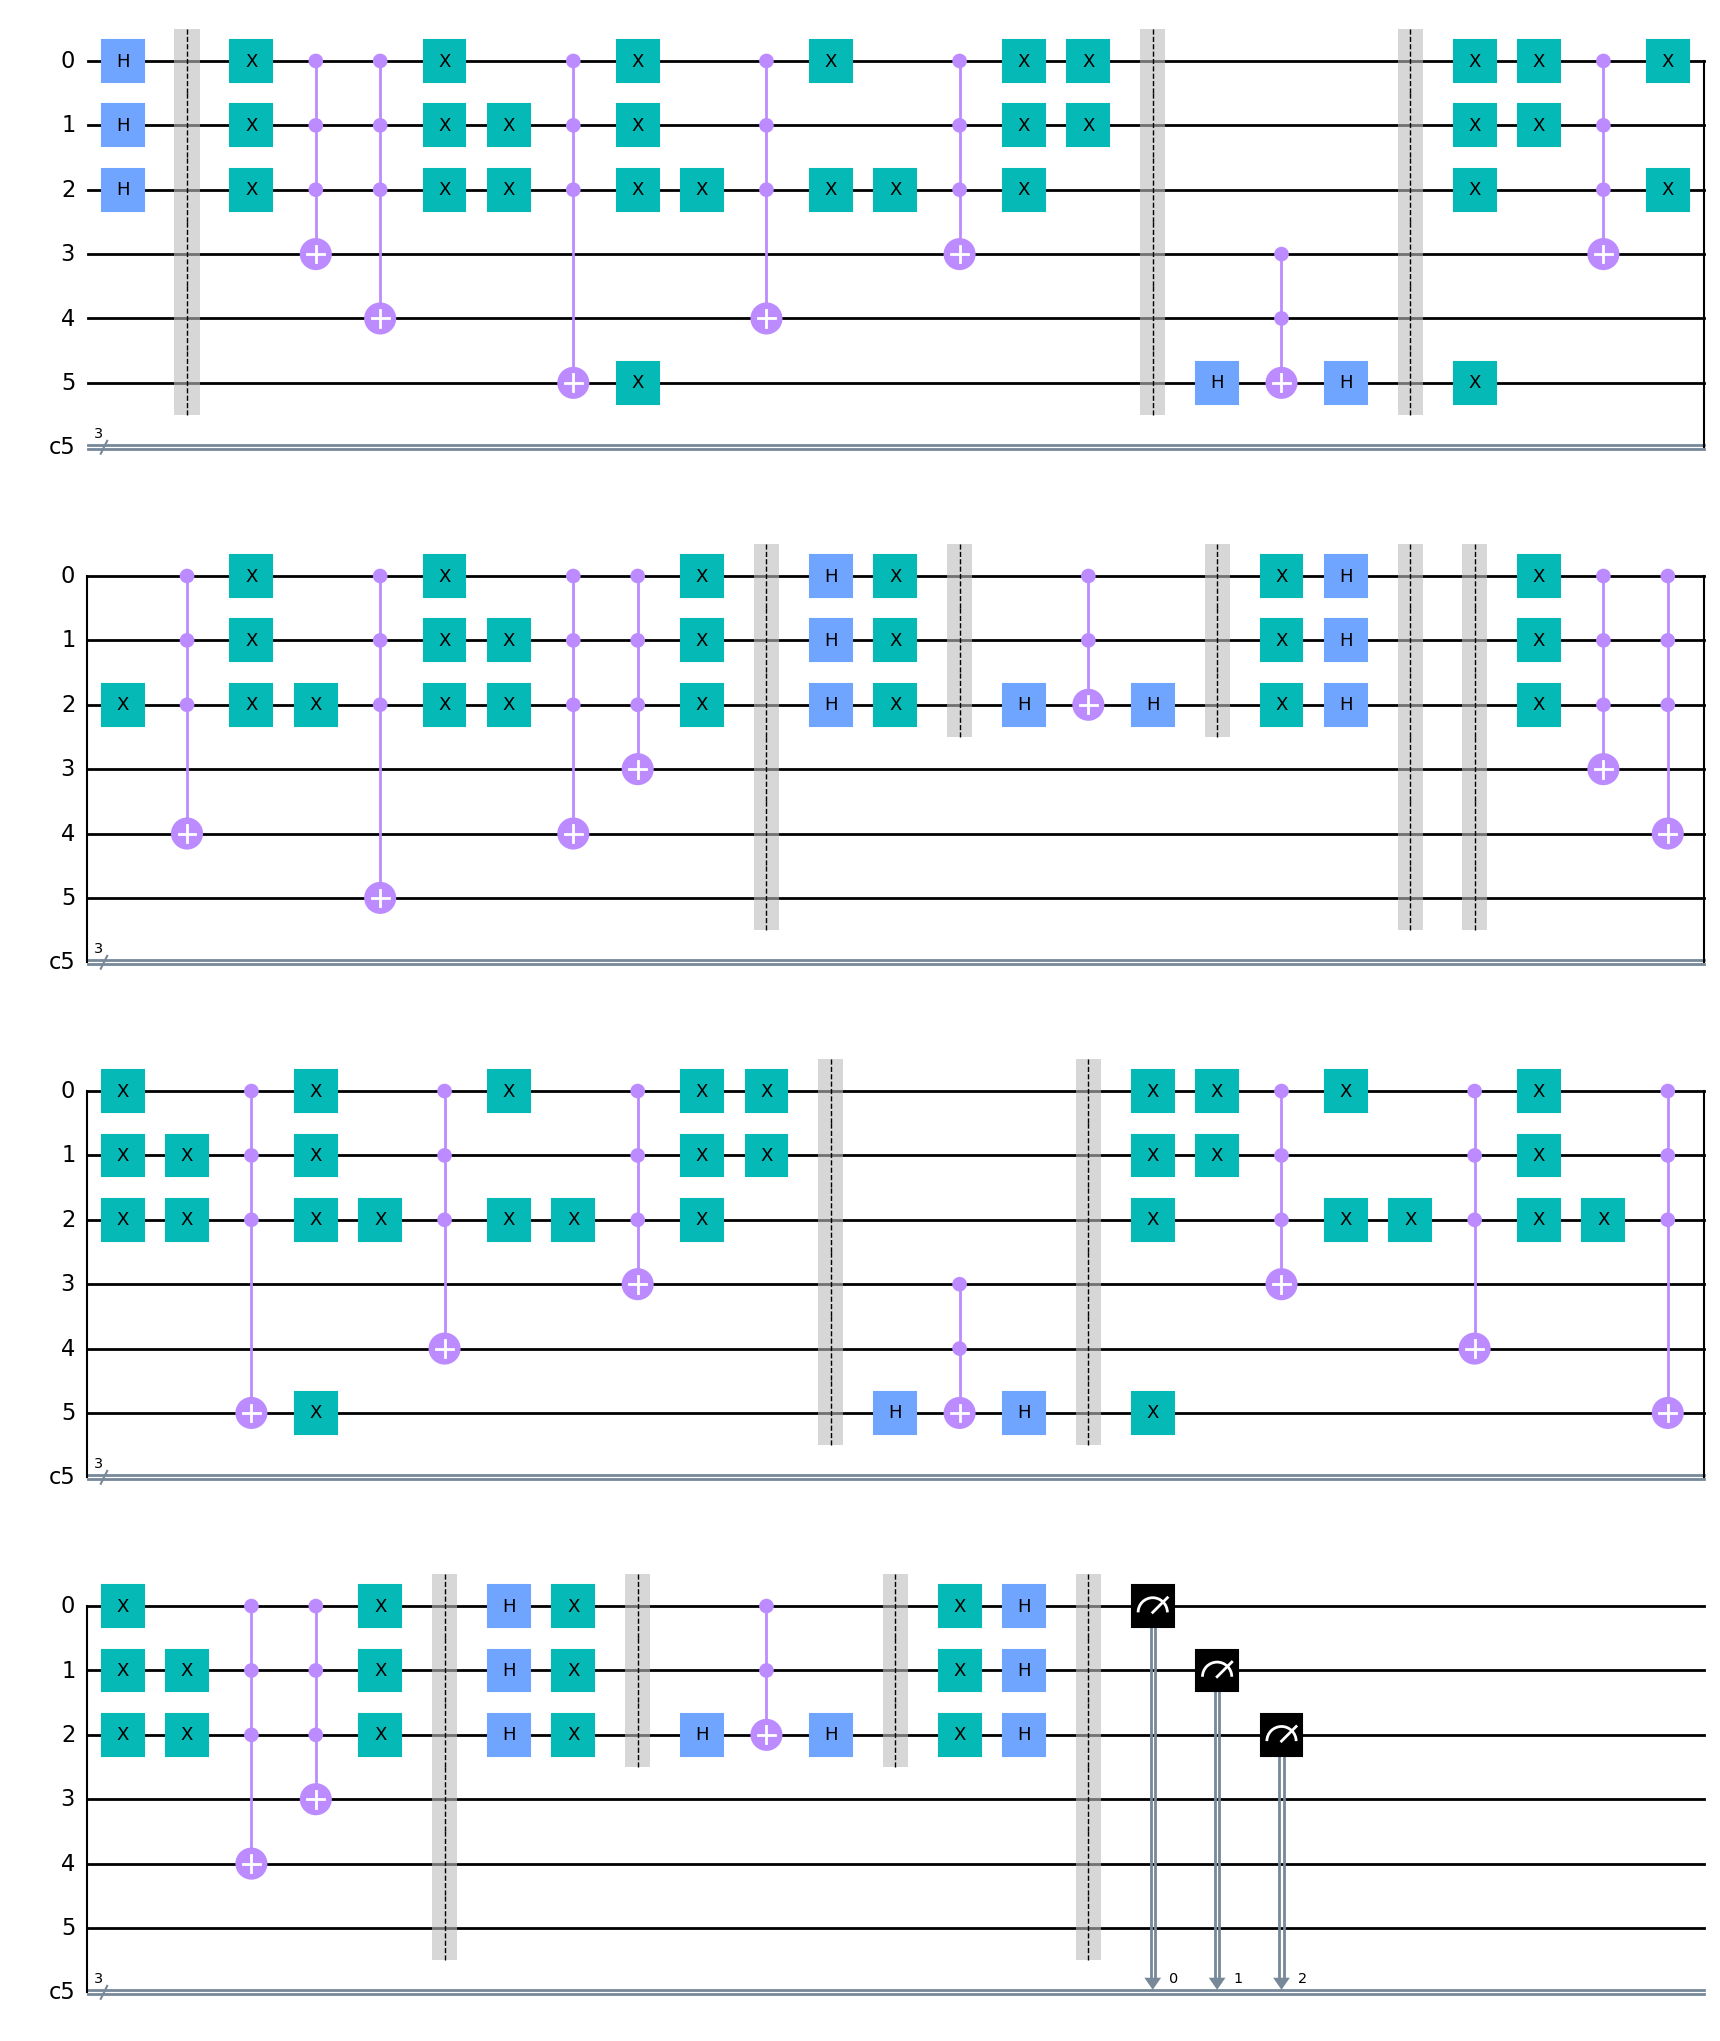

In [65]:
op = QuantumOperation(run_qc)
op.circuit.draw('mpl')

In [66]:
if block_diagram:
    full_qc = op.circuit.copy()
    for _ in range(3):
        full_qc = full_qc.decompose()
    full_qc.draw('mpl')

0.005026817321777344 seconds


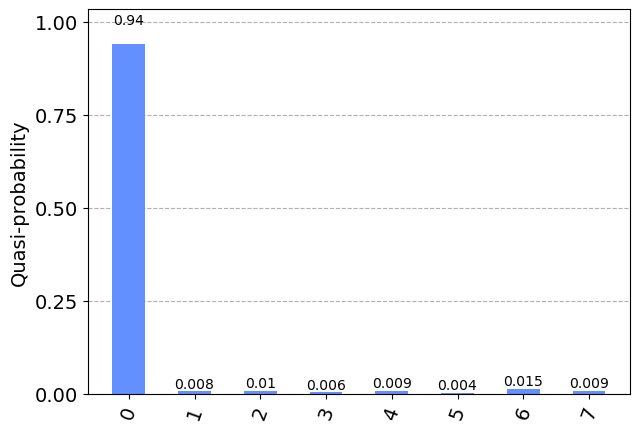

In [67]:
r = op.run_circuit()
print(f"{r.time_taken} seconds")
plot_histogram({int(t[0], 2) : round(t[1] / sum(r.get_counts().values()) * 100, 4) for t in r.get_counts().items()})

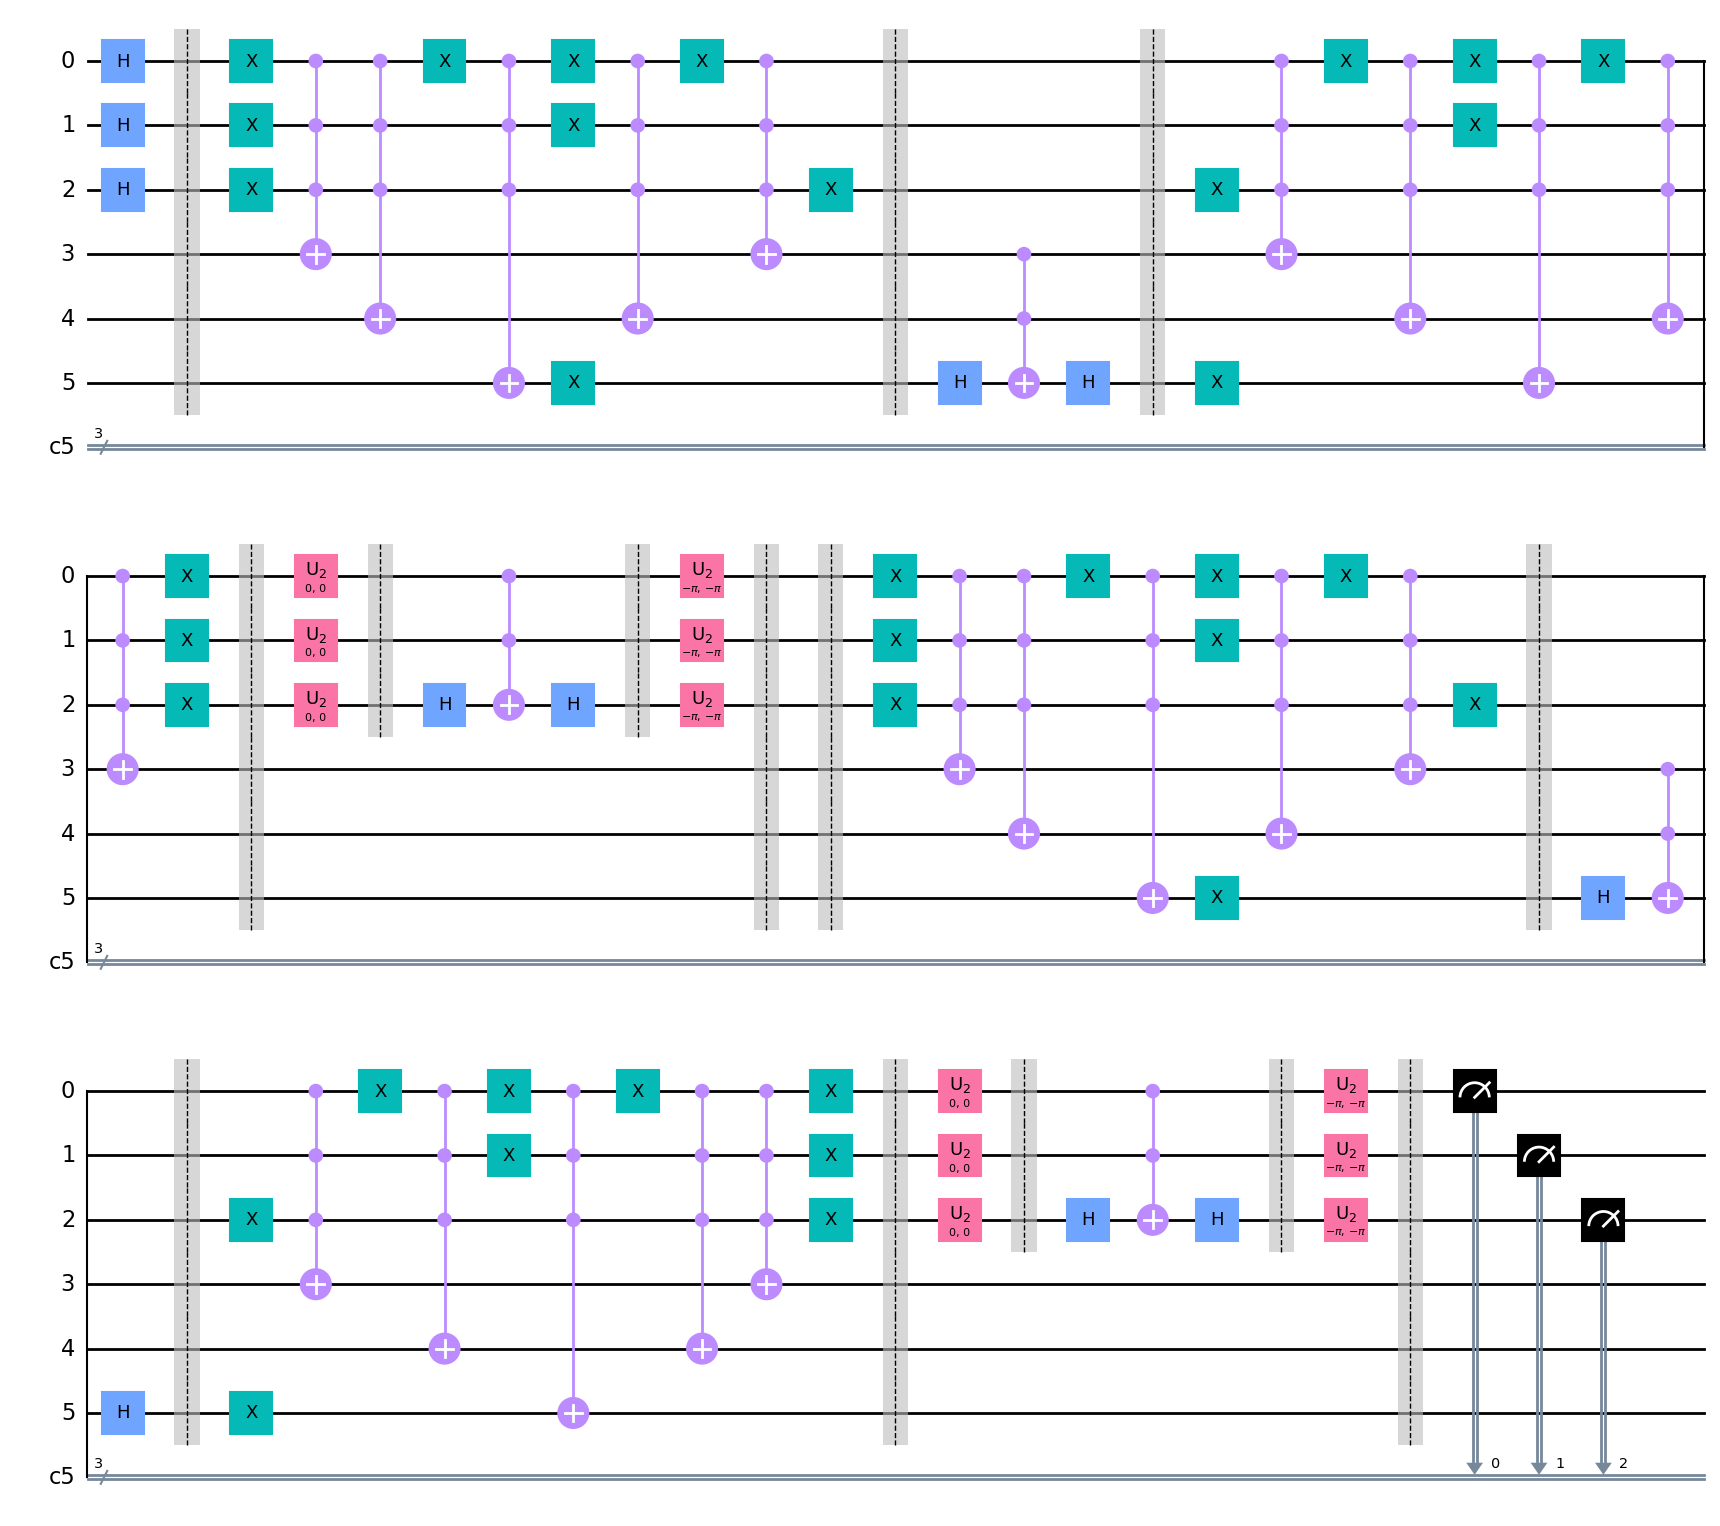

In [68]:
#After transpiling
run_qc_transpile = transpile(op.circuit, Aer.get_backend('aer_simulator'), optimization_level=3)
op.set_circuit(run_qc_transpile)
run_qc_transpile.draw('mpl')

0.005987644195556641 seconds


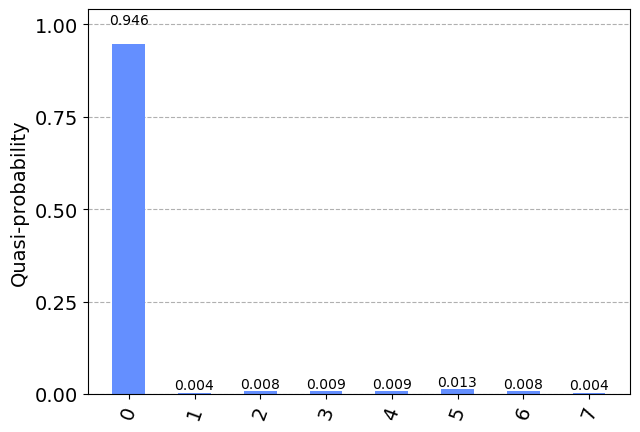

In [69]:
r = op.run_circuit()
print(f"{r.time_taken} seconds")
plot_histogram({int(t[0], 2) : round(t[1] / sum(r.get_counts().values()) * 100, 4) for t in r.get_counts().items()})